# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [80]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))

#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [81]:
u1 = np.random.randint(3, size=(3, 1))
print(u1)
print("----------------------------------------")    
u2 = np.random.randint(3, size=(3, 1))         
print(u2)
print("----------------------------------------")    
u3 = np.random.randint(3, size=(3, 1))      
print(u3)    
print("----------------------------------------")    
print(np.linalg.matrix_rank(np.hstack((u1, u2, u3))))   


[[1]
 [2]
 [0]]
----------------------------------------
[[2]
 [0]
 [0]]
----------------------------------------
[[1]
 [2]
 [1]]
----------------------------------------
3


In [2]:
#type your code here:



--------u1------------
[[4]
 [9]
 [6]]
---------------------
--------u2------------
[[6]
 [8]
 [8]]
---------------------
--------u3------------
[[0]
 [9]
 [6]]
---------------------
--------rank([u1, u2, u3])------------
3
---------------------


#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

### ---------------------------------------------------Write your answer here--------------------------------------------







### --------------------------------------------------------------------------------------------------------------------------------

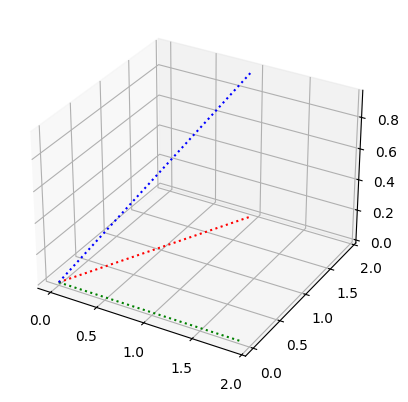

In [82]:
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')
ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')
ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')
plt.show()

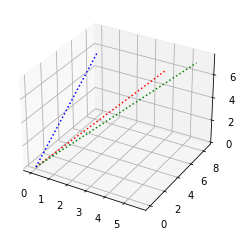

In [3]:
#type your code here


#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:

we should apply this projection equation 

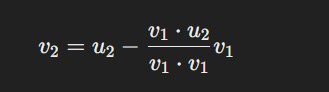


- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

[[1]
 [2]
 [0]]
----------------------------------------
[[ 1.6]
 [-0.8]
 [ 0. ]]
----------------------------------------
[[0.]]
----------------------------------------


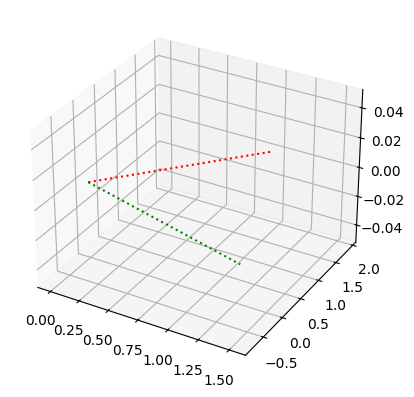

In [83]:
v1 = u1 
print(v1)
print("----------------------------------------")
v2 = u2 - (np.dot(v1.T, u2) / np.dot(v1.T, v1)) * v1
print(v2)
print("----------------------------------------")
print(np.dot(v1.T, v2))
print("----------------------------------------")   
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r:')
ax.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g:')
# ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')
plt.show()

--------v1------------
[[4]
 [9]
 [6]]
---------------------
--------v2------------
[[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]
---------------------
--------v1 . v2------------
[[0.]]
---------------------


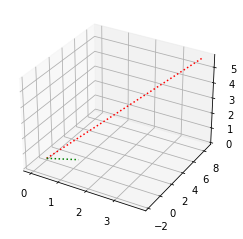

In [4]:
#type your code here


#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [84]:
v3 = u3 - (np.dot(v1.T, u3) / np.dot(v1.T, v1)) * v1 - (np.dot(v2.T, u3) / np.dot(v2.T, v2)) * v2   
print(v3)
print("----------------------------------------")
print(np.dot(v1.T, v3))
print("----------------------------------------")
print(np.dot(v2.T, v3))
print("----------------------------------------")


[[0.]
 [0.]
 [1.]]
----------------------------------------
[[0.]]
----------------------------------------
[[0.]]
----------------------------------------


In [5]:
#type your code here


--------v3------------
[[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]
---------------------
--------v3 . v1------------
[[-1.77635684e-15]]
---------------------
--------v3 . v2------------
[[8.8817842e-16]]
---------------------


#### Add v3 to your plot as a dashed-dotted blue line. Obtain a good alignment of the graph that shows orthogonality in perspective using:
- `ax.view_init(angle1, angle2)`

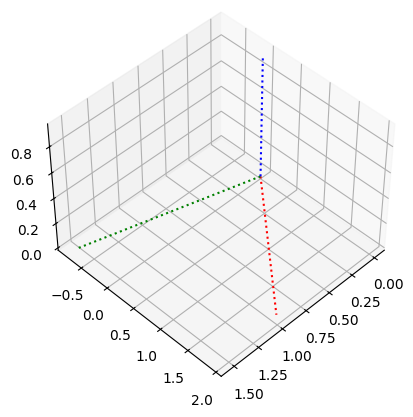

In [104]:
r = np.arange(0, 1, 0.05)
ax = plt.axes(projection='3d')
ax.plot3D(r * v1[0], r * v1[1], r * v1[2], 'r:')
ax.plot3D(r * v2[0], r * v2[1], r * v2[2], 'g:')
ax.plot3D(r * v3[0], r * v3[1], r * v3[2], 'b:')
# help us to see the plot from anthor view
ax.view_init(45, 45)                
plt.show()

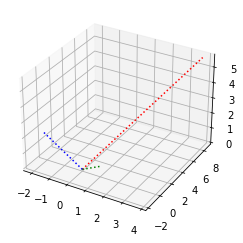

In [6]:
#type your code here


#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

Answer >> <B>as we said in the section the inverse will be the transpose</B>

In [86]:
w1 = v1 / np.linalg.norm(v1)
print(w1)
print("----------------------------------------")   
w2 = v2 / np.linalg.norm(v2)
print(w2)   
print("----------------------------------------")
w3 = v3 / np.linalg.norm(v3)
print(w3)   
print("----------------------------------------")
Q = np.hstack((w1, w2, w3))
print(Q)
print("----------------------------------------")
print(Q.T @ Q)
print("----------------------------------------") 
print("The inverse will be the transpose of Q") 
print(Q.T)


[[0.4472136 ]
 [0.89442719]
 [0.        ]]
----------------------------------------
[[ 0.89442719]
 [-0.4472136 ]
 [ 0.        ]]
----------------------------------------
[[0.]
 [0.]
 [1.]]
----------------------------------------
[[ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]
 [ 0.          0.          1.        ]]
----------------------------------------
[[ 1.00000000e+00 -1.25949234e-17  0.00000000e+00]
 [-1.25949234e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
----------------------------------------
The inverse will be the transpose of Q
[[ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]
 [ 0.          0.          1.        ]]


In [7]:
#type your code here:


--------w1------------
[[0.34684399]
 [0.78039897]
 [0.52026598]]
---------------------
--------w2------------
[[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
---------------------
--------w3------------
[[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]
---------------------
--------Q------------
[[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
---------------------
--------Q.T @ Q------------
[[ 1.00000000e+00 -6.78742704e-17 -8.48135658e-18]
 [-6.78742704e-17  1.00000000e+00  1.83949226e-16]
 [-8.48135658e-18  1.83949226e-16  1.00000000e+00]]
---------------------
--------inv(Q)------------
[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]
---------------------


# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [100]:
A = rmat(3,3)
print(A)
print("----------------------------------------")
w, v = np.linalg.eig(A)
print(w)
print("----------------------------------------")
print(v)
print("----------------------------------------")   
z = w - w.real
print(z)

[[5. 4. 5.]
 [1. 4. 8.]
 [5. 8. 6.]]
----------------------------------------
[15.70703656  2.4783585  -3.18539506]
----------------------------------------
[[-0.51304448 -0.84910513 -0.04805334]
 [-0.51373078  0.52819342 -0.74011613]
 [-0.68765257  0.00567301  0.67076001]]
----------------------------------------
[0. 0. 0.]


In [8]:
#type your code here:


------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------w------------------
[16.30136895 -1.78751922  6.48615027]
-------------------------------
------------v------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------z------------------
[0. 0. 0.]
-------------------------------


#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


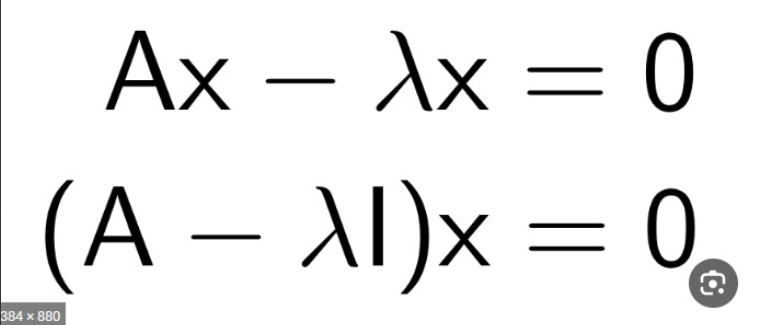


-1.0*t**3 + 15.0*t**2 + 19.0*t - 124.0
----------------------------------------
[-3.18539505969155 + 0.e-22*I, 2.47835850107027 + 0.e-19*I, 15.7070365586213 - 0.e-21*I]


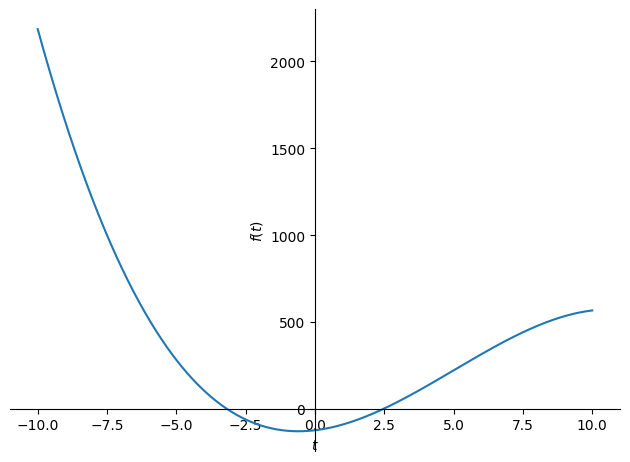

In [101]:
from sympy.abc import t
I = np.eye(3)
p = sym.det(sym.Matrix(A - t * I))
print(p)
print("----------------------------------------")
eign_vectors =sym.solve(p)
print(eign_vectors)
p1 = sym.plot(p, (t, -10, 10), show=False)
p1.show()

------------p------------------
-1.0*t**3 + 21.0*t**2 - 65.0*t - 189.0
-------------------------------
------------roots------------------
[-1.78751922313492 + 0.e-22*I, 6.48615027225818 + 0.e-19*I, 16.3013689508767 - 0.e-21*I]
-------------------------------


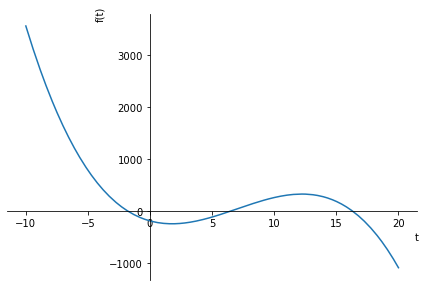

In [9]:
#typr your code here:


#### (b)Use the python to generate a matrix P and a diagonal matrix D. 

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`
 
#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 

In [102]:
w, P = np.linalg.eig(A)

print(P)
print("----------------------------------------")
D = np.diag(w)
print(D)
print("----------------------------------------")

p1 = P[:, [0]]
p2 = P[:, [1]]
p3 = P[:, [2]]

print(A @ p1 - D[0, 0] * p1)
print("----------------------------------------")
print(A @ p2 - D[1, 1] * p2)
print("----------------------------------------")
print(A @ p3 - D[2, 2] * p3)

[[-0.51304448 -0.84910513 -0.04805334]
 [-0.51373078  0.52819342 -0.74011613]
 [-0.68765257  0.00567301  0.67076001]]
----------------------------------------
[[15.70703656  0.          0.        ]
 [ 0.          2.4783585   0.        ]
 [ 0.          0.         -3.18539506]]
----------------------------------------
[[ 1.77635684e-15]
 [-1.77635684e-15]
 [ 0.00000000e+00]]
----------------------------------------
[[8.88178420e-16]
 [3.55271368e-15]
 [2.70096445e-15]]
----------------------------------------
[[-2.41473508e-15]
 [-8.88178420e-16]
 [-1.77635684e-15]]


### ---------------------------------------------------Write your answer here------------------------------------

1 -i found that the the results is near to zero or close to zero and this make >> A@p = eigen_value * p      (p = eigen vector)

2 - matrix A we can discribe it with  >>> A = PD(P**-1)        (P contains eigen_vectorS)   (D is Diagonla)



### ------------------------------------------------------------------------------------------------------------------------

In [10]:
#type your code here:


------------P------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------D------------------
[[16.30136895  0.          0.        ]
 [ 0.         -1.78751922  0.        ]
 [ 0.          0.          6.48615027]]
-------------------------------
------------A @ p1 - D[0, 0] * p1------------------
[[ 5.32907052e-15]
 [-5.32907052e-15]
 [-1.77635684e-15]]
---------------------------------------------------
------------A @ p2 - D[1, 1] * p2------------------
[[2.22044605e-16]
 [3.66373598e-15]
 [1.11022302e-15]]
---------------------------------------------------
------------A @ p3 - D[2, 2] * p3------------------
[[ 2.66453526e-15]
 [-4.44089210e-15]
 [-1.77635684e-15]]
---------------------------------------------------


#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

### ---------------------------------------------------Write your answer here------------------------------------







### ------------------------------------------------------------------------------------------------------------------------

In [ ]:
print(A)
print("----------------------------------------")
p_inv = np.linalg.inv(P)
AA = P @ D @ p_inv
print(AA)
print("----------------------------------------")

A5_with_numeric = np.linalg.matrix_power(A, 5)
print(A5_with_numeric)
print("----------------------------------------")
D5 = np.linalg.matrix_power(D, 5)
A5_with_symbolic = P @ D5 @ p_inv
print(A5_with_symbolic)
print("----------------------------------------")
A10_with_numeric = np.linalg.matrix_power(A, 10)
print(A10_with_numeric)
print("----------------------------------------")
D10 = np.linalg.matrix_power(D, 10)
A10_with_symbolic = P @ D10 @ p_inv
print(A10_with_symbolic)


[[5. 4. 5.]
 [1. 4. 8.]
 [5. 8. 6.]]
----------------------------------------
[[5. 4. 5.]
 [1. 4. 8.]
 [5. 8. 6.]]
----------------------------------------
[[189958. 301500. 346307.]
 [190005. 301812. 346993.]
 [254603. 404308. 464025.]]
----------------------------------------
[[189958. 301500. 346307.]
 [190005. 301812. 346993.]
 [254603. 404308. 464025.]]
----------------------------------------
[[1.81541350e+11 2.88283346e+11 3.31097280e+11]
 [1.81784218e+11 2.88669037e+11 3.31540140e+11]
 [2.43326575e+11 3.86396830e+11 4.43782048e+11]]
----------------------------------------
[[1.81541350e+11 2.88283346e+11 3.31097280e+11]
 [1.81784218e+11 2.88669037e+11 3.31540140e+11]
 [2.43326575e+11 3.86396830e+11 4.43782048e+11]]


In [11]:
#type your code here:
np.linalg.matrix_power(A, 5)
P @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(P)

------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------P @ D @ np.linalg.inv(P)------------------
[[ 4.00000000e+00  6.00000000e+00  7.00000000e+00]
 [ 9.00000000e+00  9.00000000e+00  8.00000000e+00]
 [ 3.00000000e+00 -1.90122146e-15  8.00000000e+00]]
-------------------------------
------------A^5------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------P @ D^5 @ P^-1------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------A^10------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901e+11 1.20451834e+12]
 [1.63488413e+11 1.34309576e+11 2.67408326e+11]]
-------------------------------
------------P @ D^10 @ P^-1------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901